In [259]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb


In [260]:
df = pd.read_csv("train.csv")
df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [261]:
df.tail()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
67458,16164945,13601,6848,13175.28583,59,BAT3193689,9.408858,C,A4,MORTGAGE,...,564.614852,0.865230,0,INDIVIDUAL,69,0,48,181775,34301,1
67459,35182714,8323,11046,15637.46301,59,BAT1780517,9.972104,C,B3,RENT,...,2.015494,1.403368,0,INDIVIDUAL,14,0,37,22692,8714,0
67460,16435904,15897,32921,12329.45775,59,BAT1761981,19.650943,A,F3,MORTGAGE,...,5.673092,1.607093,0,INDIVIDUAL,137,0,17,176857,42330,0
67461,5300325,16567,4975,21353.68465,59,BAT2333412,13.169095,D,E3,OWN,...,1.157454,0.207608,0,INDIVIDUAL,73,0,61,361339,39075,0
67462,65443173,15353,29875,14207.44860,59,BAT1930365,16.034631,B,D1,MORTGAGE,...,1.856480,0.366386,0,INDIVIDUAL,54,0,47,196960,66060,0


In [262]:
len(df.columns)

35

In [263]:
df.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [264]:
df.dtypes

ID                                int64
Loan Amount                       int64
Funded Amount                     int64
Funded Amount Investor          float64
Term                              int64
Batch Enrolled                   object
Interest Rate                   float64
Grade                            object
Sub Grade                        object
Employment Duration              object
Home Ownership                  float64
Verification Status              object
Payment Plan                     object
Loan Title                       object
Debit to Income                 float64
Delinquency - two years           int64
Inquires - six months             int64
Open Account                      int64
Public Record                     int64
Revolving Balance                 int64
Revolving Utilities             float64
Total Accounts                    int64
Initial List Status              object
Total Received Interest         float64
Total Received Late Fee         float64


In [265]:
df.shape

(67463, 35)

In [266]:
df.size

2361205

In [267]:
df.min()


ID                                   1297933
Loan Amount                             1014
Funded Amount                           1014
Funded Amount Investor           1114.590204
Term                                      36
Batch Enrolled                    BAT1104812
Interest Rate                       5.320006
Grade                                      A
Sub Grade                                 A1
Employment Duration                 MORTGAGE
Home Ownership                   14573.53717
Verification Status             Not Verified
Payment Plan                               n
Loan Title                          Bathroom
Debit to Income                     0.675299
Delinquency - two years                    0
Inquires - six months                      0
Open Account                               2
Public Record                              0
Revolving Balance                          0
Revolving Utilities                 0.005172
Total Accounts                             4
Initial Li

In [268]:
df.max()

ID                                 72245779
Loan Amount                           35000
Funded Amount                         34999
Funded Amount Investor          34999.74643
Term                                     59
Batch Enrolled                   BAT5924421
Interest Rate                     27.182348
Grade                                     G
Sub Grade                                G5
Employment Duration                    RENT
Home Ownership                  406561.5364
Verification Status                Verified
Payment Plan                              n
Loan Title                         vacation
Debit to Income                   39.629862
Delinquency - two years                   8
Inquires - six months                     5
Open Account                             37
Public Record                             4
Revolving Balance                    116933
Revolving Utilities               100.88005
Total Accounts                           72
Initial List Status             

In [269]:
df.describe()


,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,6.746300e+04,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,...,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.0,67463.000000,6.746300e+04,67463.000000,67463.000000
mean,2.562761e+07,16848.902776,15770.599114,14621.799323,58.173814,11.846258,80541.502522,23.299241,0.327127,0.145754,...,1.143969,59.691578,1.125141,0.021301,71.163260,0.0,146.467990,1.595739e+05,23123.005544,0.092510
std,2.109155e+07,8367.865726,8150.992662,6785.345170,3.327441,3.718629,45029.120366,8.451824,0.800888,0.473291,...,5.244365,357.026346,3.489885,0.144385,43.315845,0.0,744.382233,1.390332e+05,20916.699999,0.289747
min,1.297933e+06,1014.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,...,0.000003,0.000036,0.000036,0.000000,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,6.570288e+06,10012.000000,9266.500000,9831.684984,58.000000,9.297147,51689.843335,16.756416,0.000000,0.000000,...,0.021114,1.629818,0.476259,0.000000,35.000000,0.0,24.000000,5.037900e+04,8155.500000,0.000000
50%,1.791565e+07,16073.000000,13042.000000,12793.682170,59.000000,11.377696,69335.832680,22.656658,0.000000,0.000000,...,0.043398,3.344524,0.780141,0.000000,68.000000,0.0,36.000000,1.183690e+05,16733.000000,0.000000
75%,4.271521e+07,22106.000000,21793.000000,17807.594120,59.000000,14.193533,94623.322785,30.048400,0.000000,0.000000,...,0.071884,5.453727,1.070566,0.000000,105.000000,0.0,46.000000,2.283750e+05,32146.500000,0.000000
max,7.224578e+07,35000.000000,34999.000000,34999.746430,59.000000,27.182348,406561.536400,39.629862,8.000000,5.000000,...,42.618882,4354.467419,166.833000,1.000000,161.000000,0.0,16421.000000,1.177412e+06,201169.000000,1.000000


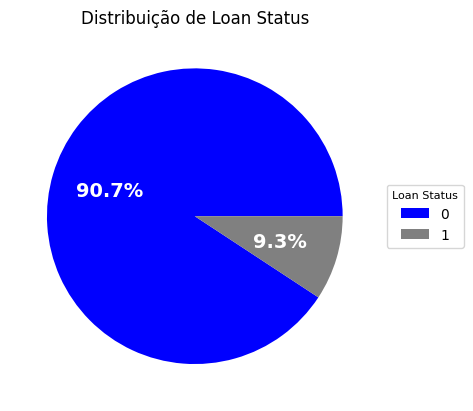

In [270]:
loan_status_counts = df["Loan Status"].value_counts()

# Criar uma lista de cores para cada setor
colors = ['blue', 'grey']

# Criar o gráfico de pizza
plt.pie(loan_status_counts, labels=loan_status_counts.index, colors=colors, autopct='%1.1f%%',textprops={'fontsize': 14, 'weight': 'bold', 'color': 'white'})

# Adicionar um título
plt.title('Distribuição de Loan Status', fontsize=12)
plt.legend(loan_status_counts.index, title="Loan Status", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)

# Mostrar o gráfico
plt.show()

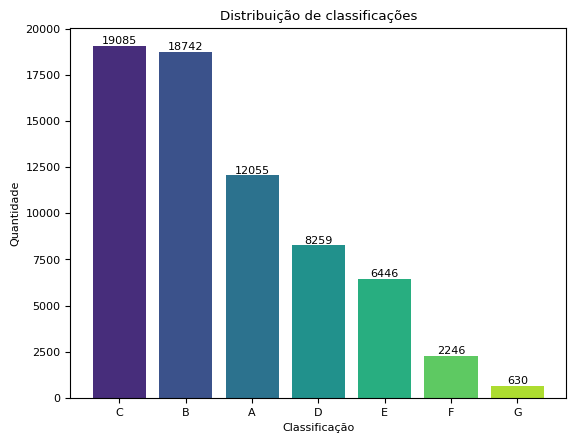

In [271]:
# Contar a ocorrência de cada valor na coluna "Loan Status"
grade_counts = df["Grade"].value_counts()

# Criar uma lista de cores para cada barra
colors = sns.color_palette("viridis", 7)

# Criar o gráfico de barras
plt.bar(grade_counts.index, grade_counts, color=colors)

# Adicionar rótulos e título
plt.xlabel("Classificação")
plt.ylabel("Quantidade")
plt.title("Distribuição de classificações")

# Adicionar anotações nas barras
for i, value in enumerate(grade_counts):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')
# Mostrar o gráfico
plt.show()

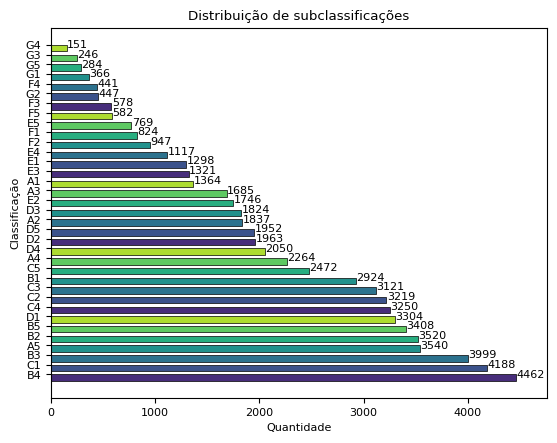

In [272]:
# Ajuste o tamanho da fonte
plt.rcParams.update({'font.size': 8})

# Seu código para obter os dados
grade_counts = df["Sub Grade"].value_counts()

# Criar uma lista de cores para cada barra
colors = sns.color_palette("viridis", 7)

# Definir a largura das barras e o espaçamento
bar_width = 0.8  # Largura das barras
bar_spacing = 0.4  # Ajuste o valor para aumentar ou diminuir o espaçamento entre as barras

# Calcular a posição ajustada para cada barra
positions = range(len(grade_counts))
bar_positions = [pos * (bar_width + bar_spacing) for pos in positions]

# Criar o gráfico de barras horizontal com espaçamento
plt.barh(bar_positions, grade_counts, color=colors, height=bar_width, edgecolor='black', linewidth=0.5)

# Adicionar rótulos e título
plt.yticks([pos + bar_width / 2 for pos in bar_positions], grade_counts.index)  # Ajustar posições dos rótulos
plt.xlabel("Quantidade")
plt.ylabel("Classificação")
plt.title("Distribuição de subclassificações")

# Adicionar anotações nas barras
for i, value in zip(bar_positions, grade_counts):
    plt.text(value + 5, i + bar_width / 2, str(value), ha='left', va='center')

# Ajustar os limites do eixo x para acomodar os rótulos
plt.xlim(0, max(grade_counts) + 300)

# Mostrar o gráfico
plt.show()


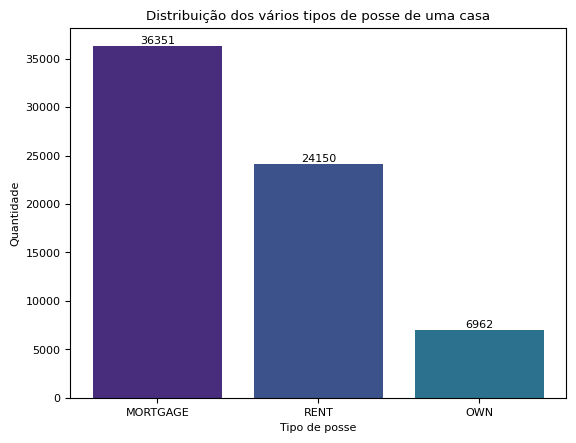

In [273]:
grade_counts = df["Employment Duration"].value_counts()

# Criar uma lista de cores para cada barra
colors = sns.color_palette("viridis", 7)

# Criar o gráfico de barras
plt.bar(grade_counts.index, grade_counts, color=colors)

# Adicionar rótulos e título
plt.xlabel("Tipo de posse")
plt.ylabel("Quantidade")
plt.title("Distribuição dos vários tipos de posse de uma casa")

# Adicionar anotações nas barras
for i, value in enumerate(grade_counts):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')
# Mostrar o gráfico
plt.show()

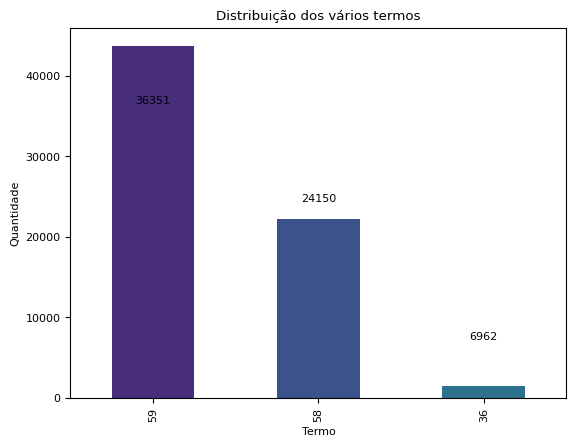

In [274]:
df["Term"].value_counts().plot.bar(color=colors)
colors = sns.color_palette("viridis", 7)
plt.xlabel("Termo")
plt.ylabel("Quantidade")
plt.title("Distribuição dos vários termos")
for i, value in enumerate(grade_counts):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')
# Mostrar o gráfico
plt.show()

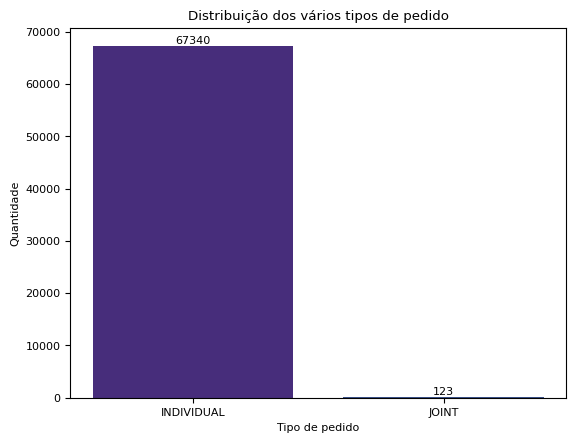

In [275]:
grade_counts = df["Application Type"].value_counts()

# Criar uma lista de cores para cada barra
colors = sns.color_palette("viridis", 7)

# Criar o gráfico de barras
plt.bar(grade_counts.index, grade_counts, color=colors)

# Adicionar rótulos e título
plt.xlabel("Tipo de pedido")
plt.ylabel("Quantidade")
plt.title("Distribuição dos vários tipos de pedido")

# Adicionar anotações nas barras
for i, value in enumerate(grade_counts):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')
# Mostrar o gráfico
plt.show()

In [276]:
df.isna().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

In [277]:
df.isna().sum().sum()


0

In [278]:
df.isnull().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

In [279]:
df.drop_duplicates(inplace=True)

In [280]:
df.iloc[:, [0] + list(range(9, 11))]

,ID,Employment Duration,Home Ownership
0,65087372,MORTGAGE,176346.62670
1,1450153,RENT,39833.92100
2,1969101,MORTGAGE,91506.69105
3,6651430,MORTGAGE,108286.57590
4,14354669,MORTGAGE,44234.82545
...,...,...,...
67458,16164945,MORTGAGE,83961.15003
67459,35182714,RENT,65491.12817
67460,16435904,MORTGAGE,34813.96985
67461,5300325,OWN,96938.83564


In [281]:
desired_values = ['RENT', 'MORTGAGE', 'OWN']

has_desired_value = any(df.loc[0, 'Home Ownership'] == val for val in desired_values)

if has_desired_value:
    print(df.iloc[:, [0] + list(range(9, 11))])
else:
    df.rename(columns={'Home Ownership': 'Employment DurationAux'}, inplace=True)
    df.rename(columns={'Employment Duration': 'Home Ownership'}, inplace=True)
    df.rename(columns={'Employment DurationAux': 'Employment Duration'}, inplace=True)

In [282]:
df['Loan Title'] = df['Loan Title'].str.lower()
len(df['Loan Title'].unique())
df['Loan Title'].unique()

array(['debt consolidation', 'credit card refinancing',
       'home improvement', 'credit consolidation', 'green loan', 'other',
       'moving and relocation', 'credit cards', 'medical expenses',
       'refinance', 'credit card consolidation', 'lending club',
       'debt consolidation loan', 'major purchase', 'vacation',
       'business', 'credit card payoff', 'credit card',
       'credit card refi', 'personal loan', 'cc refi', 'consolidate',
       'medical', 'loan 1', 'consolidation', 'card consolidation',
       'car financing', 'debt', 'home buying', 'freedom', 'consolidated',
       'get out of debt', 'consolidation loan', 'dept consolidation',
       'personal', 'cards', 'bathroom', 'refi', 'credit card loan',
       'credit card debt', 'house', 'debt consolidation 2013',
       'debt loan', 'cc refinance', 'home', 'cc consolidation',
       'credit card refinance', 'credit loan', 'payoff',
       'bill consolidation', 'credit card paydown', 'credit card pay off',
       'g

In [283]:
map_dict = {'Loan Title':{'debt consolidation':'debt consolidation', \
                'debt consolidation loan':'debt consolidation', \
                'debt consolidation 2013':'debt consolidation', \
                'dept consolidation':'debt consolidation' ,
                'credit card refinancing':'credit card refinancing', \
                'refinance':'credit card refinancing', \
                'cc refinance':'credit card refinancing',\
                'credit card refinance':'credit card refinancing',\
                'cc-refinance':'credit card refinancing', \
                'refinance loan':'credit card refinancing', \
                'credit card refinance loan':'credit card refinancing',\
                'credit card refi':'credit card refinancing', \
                'cc refi':'credit card refinancing', \
                'refi':'credit card refinancing'  ,
                'home improvement':'home improvement',\
                'home improvement loan':'home improvement',\
                'bathroom':'home improvement',\
                'pool':'home improvement' ,
                'home buying':'home buy',\
                'house':'home buy',\
                'home':'home buy',\
                'home loan':'home buy' ,
                'credit consolidation':'credit consolidation',\
                'consolidation loan':'credit consolidation',\
                'cc consolidation':'credit consolidation',\
                'conso':'credit consolidation',\
                'credit card consolidation':'credit consolidation',\
                'card consolidation':'credit consolidation',\
                'loan consolidation':'credit consolidation',\
                'consolidate':'credit consolidation',\
                'consolidated':'credit consolidation' ,
                'medical':'medical purpose',\
                'medical expenses':'medical purpose',\
                'medical loan':'medical purpose'  ,
                'lending club' : 'lending purpose' , \
                'lending loan' : 'lending purpose'  ,
                'business' : 'business purpose' , \
                'green loan' : 'business purpose' , \
                'moving and relocation' : 'business purpose'  , \
                'credit cards' : 'credit cards payoff' , \
                'credit card' : 'credit cards payoff' , \
                'credit card loan' : 'credit cards payoff' , \
                'credit' : 'credit cards payoff' , \
                'credit card debt' : 'credit cards payoff' , \
                'cc loan' : 'credit cards payoff' , \
                'cc' : 'credit cards payoff' , \
                'cards' : 'credit cards payoff' , \
                'credit card payoff' : 'credit cards payoff' , \
                'credit pay off' : 'credit cards payoff' , \
                'credit payoff' : 'credit cards payoff' , \
                'credit loan' : 'credit cards payoff' , \
                'payoff' : 'credit cards payoff' , \
                'pay off' : 'credit cards payoff' , \
                'credit card paydown' : 'credit cards payoff' , \
                'credit card pay off' : 'credit cards payoff' ,
                'personal loan' : 'perosonal purpose' , \
                'personal' : 'perosonal purpose' , \
                'wedding loan' : 'perosonal purpose' , \
                'getting ahead' : 'perosonal purpose' , \
                'vacation' : 'perosonal purpose' , \
                'major purchase' : 'perosonal purpose'  , \
                'car financing' : 'vehicle purpose' , \
                'car loan' : 'vehicle purpose' , \
                'debt' : 'debt payoff' , \
                'get out of debt' : 'debt payoff' , \
                'debt loan' : 'debt payoff' , \
                'get debt free' : 'debt payoff' , \
                'debt payoff' : 'debt payoff' , \
                'debt free' : 'debt payoff' , \
                'freedom' : 'debt payoff' , \
                'relief' : 'debt payoff' , \
                'debt reduction' : 'debt payoff' , \
                'bill consolidation' : 'bill payoff' , \
                'bill payoff' : 'bill payoff' , \
                'pay off bills' : 'bill payoff' , \
                'bills' : 'bill payoff'  , \
                'other' : 'other purpose' , \
                'loan 1' : 'other purpose' , \
                'loan1' : 'other purpose' , \
                'loan' : 'other purpose' , \
                'myloan' : 'other purpose' , \
                'my loan' : 'other purpose' }
            }

In [284]:

df.replace(map_dict, inplace=True)
len(df['Loan Title'].unique())

15

In [285]:
df['Loan Title'].unique()

array(['debt consolidation', 'credit card refinancing',
       'home improvement', 'credit consolidation', 'business purpose',
       'other purpose', 'credit cards payoff', 'medical purpose',
       'lending purpose', 'perosonal purpose', 'consolidation',
       'vehicle purpose', 'debt payoff', 'home buy', 'bill payoff'],
      dtype=object)

In [286]:
df = df.drop(columns=['ID'])
df = df.drop(columns=['Payment Plan'])
df = df.drop(columns=['Accounts Delinquent'])
df = df.drop(columns=['Batch Enrolled'])
df =df.drop(columns=['Application Type'])

In [287]:

colunas_nao_numericas = df.select_dtypes(exclude=['number']).columns

df[colunas_nao_numericas] = df[colunas_nao_numericas].apply(lambda x: x.str.lower().str.replace(' ', '') if x.dtype == 'O' else x)

print(df.head())

   Loan Amount  Funded Amount  Funded Amount Investor  Term  Interest Rate  \
0        10000          32236             12329.36286    59      11.135007   
1         3609          11940             12191.99692    59      12.237563   
2        28276           9311             21603.22455    59      12.545884   
3        11170           6954             17877.15585    59      16.731201   
4        16890          13226             13539.92667    59      15.008300   

  Grade Sub Grade Home Ownership  Employment Duration Verification Status  \
0     b        c4       mortgage         176346.62670         notverified   
1     c        d3           rent          39833.92100      sourceverified   
2     f        d4       mortgage          91506.69105      sourceverified   
3     c        c3       mortgage         108286.57590      sourceverified   
4     c        d4       mortgage          44234.82545      sourceverified   

   ... Total Received Interest  Total Received Late Fee   Recoveries

In [288]:
colunas_nao_numericas = df.select_dtypes(exclude=['number']).columns

df = pd.get_dummies(df, columns=colunas_nao_numericas, drop_first=True)

df.replace({False: 0, True: 1}, inplace=True)

print(df.head())

   Loan Amount  Funded Amount  Funded Amount Investor  Term  Interest Rate  \
0        10000          32236             12329.36286    59      11.135007   
1         3609          11940             12191.99692    59      12.237563   
2        28276           9311             21603.22455    59      12.545884   
3        11170           6954             17877.15585    59      16.731201   
4        16890          13226             13539.92667    59      15.008300   

   Employment Duration  Debit to Income  Delinquency - two years  \
0         176346.62670        16.284758                        1   
1          39833.92100        15.412409                        0   
2          91506.69105        28.137619                        0   
3         108286.57590        18.043730                        1   
4          44234.82545        17.209886                        1   

   Inquires - six months  Open Account  ...  Loan Title_debtconsolidation  \
0                      0            13  ...  

In [289]:
colunas = ['Employment Duration', 'Interest Rate', 'Inquires - six months', 'Total Accounts',
               'Total Received Interest', 'Total Received Late Fee', 'Recoveries', 
               'Collection Recovery Fee', 'Collection 12 months Medical', 
               'Total Collection Amount', 'Total Revolving Credit Limit']

for coluna in colunas:
  Q1 = df[coluna].quantile(q = 0.25)
  Q3 = df[coluna].quantile(q = 0.75)
  IQR = Q3 - Q1
  superior = Q3 + IQR 
  inferior = Q1 - IQR
  df.drop( df.loc[ df[coluna] > superior ].index, axis = 0, inplace = True )
  df.drop( df.loc[ df[coluna] < inferior ].index, axis = 0, inplace = True )

In [290]:
df.drop(['Collection 12 months Medical', 'Inquires - six months'], axis = 1, inplace = True)

In [291]:
X = df.drop(['Loan Status'], axis = 1)
y = df['Loan Status']
underS = RandomUnderSampler()


In [292]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Normalização
for col in X:
    feature_range = (X_train[col].min(), X_train[col].max())
    
    if feature_range[0] < 0 or feature_range[1] > 1:
        scaler = MinMaxScaler()
        X_train[col] = scaler.fit_transform(X_train[[col]])
        X_test[col] = scaler.transform(X_test[[col]])
        
X_train, y_train = underS.fit_resample(X_train, y_train)

knn_model = KNeighborsClassifier(n_neighbors=5)  # Número de vizinhos

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Precisão: {accuracy}")
print("\nMatriz de Confusão:")
print(conf_matrix)
print("\nRelatório de Classificação:")
print(class_report)

Precisão: 0.5125507289944387

Matriz de Confusão:
[[3099 2936]
 [ 307  311]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.91      0.51      0.66      6035
           1       0.10      0.50      0.16       618

    accuracy                           0.51      6653
   macro avg       0.50      0.51      0.41      6653
weighted avg       0.83      0.51      0.61      6653



In [293]:
svm_model = SVC(random_state=42)  

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

print("Resultados do Modelo SVM:")
print(f"Precisão: {accuracy_svm}")
print("\nMatriz de Confusão:")
print(conf_matrix_svm)
print("\nRelatório de Classificação:")
print(class_report_svm)


Resultados do Modelo SVM:
Precisão: 0.5224710656846535

Matriz de Confusão:
[[3173 2862]
 [ 315  303]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.91      0.53      0.67      6035
           1       0.10      0.49      0.16       618

    accuracy                           0.52      6653
   macro avg       0.50      0.51      0.41      6653
weighted avg       0.83      0.52      0.62      6653



In [294]:
nb_model = GaussianNB() 
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
class_report_nb = classification_report(y_test, y_pred_nb)

print(f"Precisão (Naive Bayes): {accuracy_nb}")
print("\nMatriz de Confusão (Naive Bayes):")
print(conf_matrix_nb)
print("\nRelatório de Classificação (Naive Bayes):")
print(class_report_nb)


Precisão (Naive Bayes): 0.6424169547572524

Matriz de Confusão (Naive Bayes):
[[4057 1978]
 [ 401  217]]

Relatório de Classificação (Naive Bayes):
              precision    recall  f1-score   support

           0       0.91      0.67      0.77      6035
           1       0.10      0.35      0.15       618

    accuracy                           0.64      6653
   macro avg       0.50      0.51      0.46      6653
weighted avg       0.83      0.64      0.72      6653



In [295]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
class_report_lr = classification_report(y_test, y_pred_lr)

print(f"Precisão (Logistic Regression): {accuracy_lr}")
print("\nMatriz de Confusão (Logistic Regression):")
print(conf_matrix_lr)
print("\nRelatório de Classificação (Logistic Regression):")
print(class_report_lr)


Precisão (Logistic Regression): 0.5320907861115286

Matriz de Confusão (Logistic Regression):
[[3237 2798]
 [ 315  303]]

Relatório de Classificação (Logistic Regression):
              precision    recall  f1-score   support

           0       0.91      0.54      0.68      6035
           1       0.10      0.49      0.16       618

    accuracy                           0.53      6653
   macro avg       0.50      0.51      0.42      6653
weighted avg       0.84      0.53      0.63      6653



In [296]:
bagging_model = BaggingClassifier(random_state=42)
bagging_model.fit(X_train, y_train)

y_pred_bagging = bagging_model.predict(X_test)

accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
conf_matrix_bagging = confusion_matrix(y_test, y_pred_bagging)
class_report_bagging = classification_report(y_test, y_pred_bagging)

print(f"Precisão (Bagging Classifier): {accuracy_bagging}")
print("\nMatriz de Confusão (Bagging Classifier):")
print(conf_matrix_bagging)
print("\nRelatório de Classificação (Bagging Classifier):")
print(class_report_bagging)

Precisão (Bagging Classifier): 0.5977754396512851

Matriz de Confusão (Bagging Classifier):
[[3734 2301]
 [ 375  243]]

Relatório de Classificação (Bagging Classifier):
              precision    recall  f1-score   support

           0       0.91      0.62      0.74      6035
           1       0.10      0.39      0.15       618

    accuracy                           0.60      6653
   macro avg       0.50      0.51      0.44      6653
weighted avg       0.83      0.60      0.68      6653



In [297]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f"Precisão (Random Forest): {accuracy_rf}")
print("\nMatriz de Confusão (Random Forest):")
print(conf_matrix_rf)
print("\nRelatório de Classificação (Random Forest):")
print(class_report_rf)

Precisão (Random Forest): 0.5257778445813919

Matriz de Confusão (Random Forest):
[[3209 2826]
 [ 329  289]]

Relatório de Classificação (Random Forest):
              precision    recall  f1-score   support

           0       0.91      0.53      0.67      6035
           1       0.09      0.47      0.15       618

    accuracy                           0.53      6653
   macro avg       0.50      0.50      0.41      6653
weighted avg       0.83      0.53      0.62      6653



In [298]:
adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_model.fit(X_train, y_train)

y_pred_adaboost = adaboost_model.predict(X_test)

accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
conf_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)
class_report_adaboost = classification_report(y_test, y_pred_adaboost)

print(f"Precisão (AdaBoost): {accuracy_adaboost}")
print("\nMatriz de Confusão (AdaBoost):")
print(conf_matrix_adaboost)
print("\nRelatório de Classificação (AdaBoost):")
print(class_report_adaboost)


Precisão (AdaBoost): 0.5436645122501127

Matriz de Confusão (AdaBoost):
[[3325 2710]
 [ 326  292]]

Relatório de Classificação (AdaBoost):
              precision    recall  f1-score   support

           0       0.91      0.55      0.69      6035
           1       0.10      0.47      0.16       618

    accuracy                           0.54      6653
   macro avg       0.50      0.51      0.42      6653
weighted avg       0.84      0.54      0.64      6653



In [299]:
gradientboost_model = GradientBoostingClassifier(random_state=42)
gradientboost_model.fit(X_train, y_train)

y_pred_gradientboost = gradientboost_model.predict(X_test)

accuracy_gradientboost = accuracy_score(y_test, y_pred_gradientboost)
conf_matrix_gradientboost = confusion_matrix(y_test, y_pred_gradientboost)
class_report_gradientboost = classification_report(y_test, y_pred_gradientboost)

print(f"Precisão (Gradient Boosting): {accuracy_gradientboost}")
print("\nMatriz de Confusão (Gradient Boosting):")
print(conf_matrix_gradientboost)
print("\nRelatório de Classificação (Gradient Boosting):")
print(class_report_gradientboost)

Precisão (Gradient Boosting): 0.5163084322861867

Matriz de Confusão (Gradient Boosting):
[[3131 2904]
 [ 314  304]]

Relatório de Classificação (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.91      0.52      0.66      6035
           1       0.09      0.49      0.16       618

    accuracy                           0.52      6653
   macro avg       0.50      0.51      0.41      6653
weighted avg       0.83      0.52      0.61      6653



In [300]:
xgboost_model = XGBClassifier(random_state=42)
xgboost_model.fit(X_train, y_train)

y_pred_xgboost = xgboost_model.predict(X_test)

accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
conf_matrix_xgboost = confusion_matrix(y_test, y_pred_xgboost)
class_report_xgboost = classification_report(y_test, y_pred_xgboost)

print(f"Precisão (XGBoost): {accuracy_xgboost}")
print("\nMatriz de Confusão (XGBoost):")
print(conf_matrix_xgboost)
print("\nRelatório de Classificação (XGBoost):")
print(class_report_xgboost)

C:\Users\jgasp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\jgasp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\jgasp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_

Precisão (XGBoost): 0.5166090485495265

Matriz de Confusão (XGBoost):
[[3145 2890]
 [ 326  292]]

Relatório de Classificação (XGBoost):
              precision    recall  f1-score   support

           0       0.91      0.52      0.66      6035
           1       0.09      0.47      0.15       618

    accuracy                           0.52      6653
   macro avg       0.50      0.50      0.41      6653
weighted avg       0.83      0.52      0.61      6653



C:\Users\jgasp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\jgasp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\jgasp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_

In [301]:
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

y_pred_lgb = lgb_model.predict(X_test)

accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
conf_matrix_lgb = confusion_matrix(y_test, y_pred_lgb)
class_report_lgb = classification_report(y_test, y_pred_lgb)

print(f"Precisão (LightGBM): {accuracy_lgb}")
print("\nMatriz de Confusão (LightGBM):")
print(conf_matrix_lgb)
print("\nRelatório de Classificação (LightGBM):")
print(class_report_lgb)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2383, number of negative: 2383
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000683 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3978
[LightGBM] [Info] Number of data points in the train set: 4766, number of used features: 71
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Precisão (LightGBM): 0.5113482639410792

Matriz de Confusão (LightGBM):
[[3107 2928]
 [ 323  295]]

Relatório de Classificação (LightGBM):
              precision    recall  f1-score   support

           0       0.91      0.51      0.66      6035
           1       0.09      0.48      0.15       618

    accuracy                           0.51      6653
   macro avg       0.50      0.50      0.41      6653
weighted avg       0.83      0.51      0.61      6653

